In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sys
import yaml
import torch 
sys.path.append('../../Ex6') 
sys.path.append('../../Ex6/GAN')
from GAN.trajectory_gan import TrajectoryGAN

## Load GAN model
---

In [2]:
# Load the trained GAN model

# Read config file
config_file = '../GAN/config/config.yaml'
stream = open(config_file)
conf = yaml.load(stream, Loader=yaml.FullLoader)

gan = TrajectoryGAN(conf)

gan.load_model('../GAN/trained_models/SmallerDataset/trajectory_gan_400.pt')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Load model from ../GAN/trained_models/SmallerDataset/trajectory_gan_400.pt


## Evaluate GAN
---

### Load and generate data

In [7]:
# Generate a number of trajectories from the distribution learnt by the generator
original_data, steps = gan.read_data("/../TrainingData_v2.0/TrajArr", False)
original_data = original_data[:300, :, :]
num_samples = len(original_data)
original_data_start = original_data[-num_samples:, 0, :]
original_data = original_data[-num_samples:, :, :]
trajectories = gan.generate(torch.from_numpy(original_data_start).float().to(device), steps)

loaded 100 data points
loaded 200 data points
loaded 300 data points
loaded 400 data points
Generated 300 new trajectories of length 20.


In [8]:
def plot_traj(data, title):
    fig = plt.figure()
    for i in range(data.shape[0]):
        plt.plot(data[i, :, 0], data[i, :, 1])
    plt.title(title)

In [9]:
def calc_diff(original, generated):
    diff = np.empty_like(original[:,:,0])
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            diff[i,j] = np.sqrt((generated[i, j, 0] - original[i,j,0])**2 
                                + (generated[i, j, 1] - original[i,j,1])**2)
    return diff

### Plot trajectories

Text(0.5, 1.0, 'Difference Data')

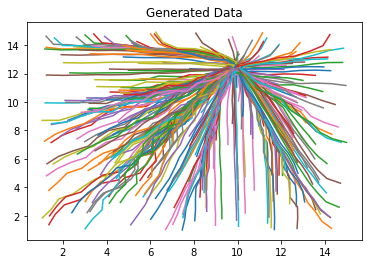

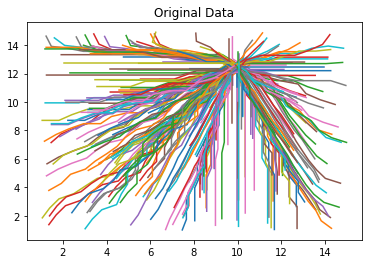

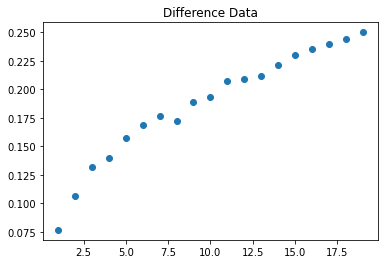

In [10]:
plot_traj(trajectories, 'Generated Data')
plot_traj(original_data, 'Original Data')

diff = calc_diff(original_data, trajectories)
avg = np.mean(diff, axis = 0)
fig = plt.figure()
plt.scatter(np.arange(steps)[1:], avg[1:])
plt.title("Difference Data")


### Generate data outside of scenario boundary

In [16]:
def generate_plot(init_points, title):
    trajectories = gan.generate(torch.from_numpy(init_points).float().to(device), 60)
    plot_traj(trajectories, title)

In [8]:
def gen_random_outside(low, high):
    return np.random.uniform(low=low, high=high, size=(10, 2))

border = 30
larger_scene_data = gen_random_outside((-border, -border), (0, 0))
larger_scene_data = np.concatenate((larger_scene_data, gen_random_outside((0, -border), (border, 0))), axis=0)
larger_scene_data = np.concatenate((larger_scene_data, gen_random_outside((-border, 0), (0, border))), axis=0)
larger_scene_data = np.concatenate((larger_scene_data, gen_random_outside((15, 0), (border, border))), axis=0)
larger_scene_data = np.concatenate((larger_scene_data, gen_random_outside((0, 15), (border, border))), axis=0)

Generated 50 new trajectories of length 60.


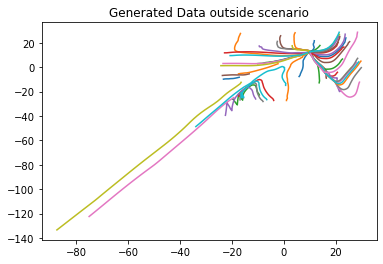

In [9]:
generate_plot(larger_scene_data, 'Generated Data outside scenario')

Generated 7 new trajectories of length 60.


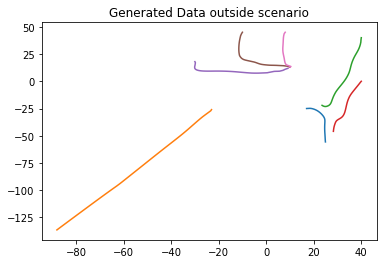

In [17]:
special_traj = np.array([[17, -25], [-23, -26], [40, 40], [40, 0], [-30, 18], [-10, 45], [8, 45]])
generate_plot(special_traj, 'Generated Data outside scenario')

Generated 4 new trajectories of length 60.


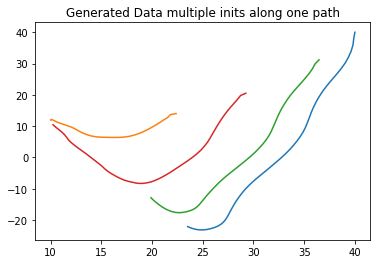

In [11]:
comparing = np.array([[40, 40], [ 2.23702679e+01, 1.40252199e+01], 
                      [ 3.64603043e+01, 3.11882954e+01], [ 2.92418804e+01, 2.05197449e+01]])
generate_plot(comparing, 'Generated Data multiple inits along one path')